# Bài tập 1: Chọn vùng ảnh LangBiang

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

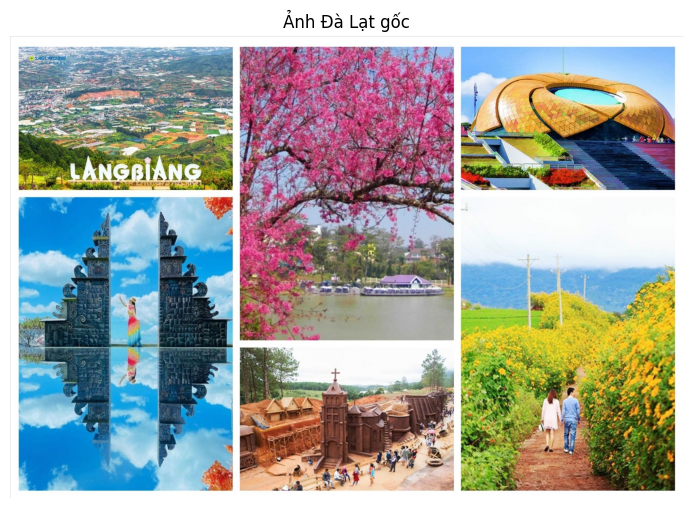

In [2]:
# Đọc ảnh Đà Lạt từ thư mục exercise
dalat_img = cv2.imread('exercise/dalat.jpg')
dalat_rgb = cv2.cvtColor(dalat_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(dalat_rgb)
plt.title('Ảnh Đà Lạt gốc')
plt.axis('off')
plt.show()

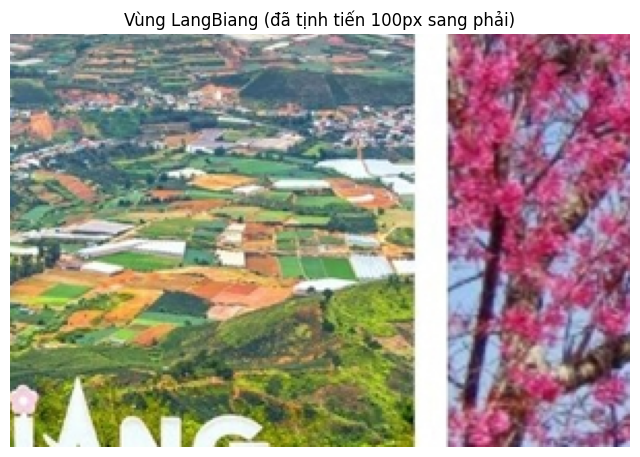

In [3]:
# Chọn vùng LangBiang và tịnh tiến sang phải 100px
h, w = dalat_img.shape[:2]
x, y, width, height = 200, 100, 300, 200  # Vùng LangBiang

# Tịnh tiến sang phải 100px
x_shifted = x + 100
langbiang_region = dalat_img[y:y+height, x_shifted:x_shifted+width]

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(langbiang_region, cv2.COLOR_BGR2RGB))
plt.title('Vùng LangBiang (đã tịnh tiến 100px sang phải)')
plt.axis('off')
plt.show()

C:\Users\VUHOANG\AppData\Local\Temp\ipykernel_13308\1636689596.py:22: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(gray_langbiang.ravel(), 256, [0, 256])


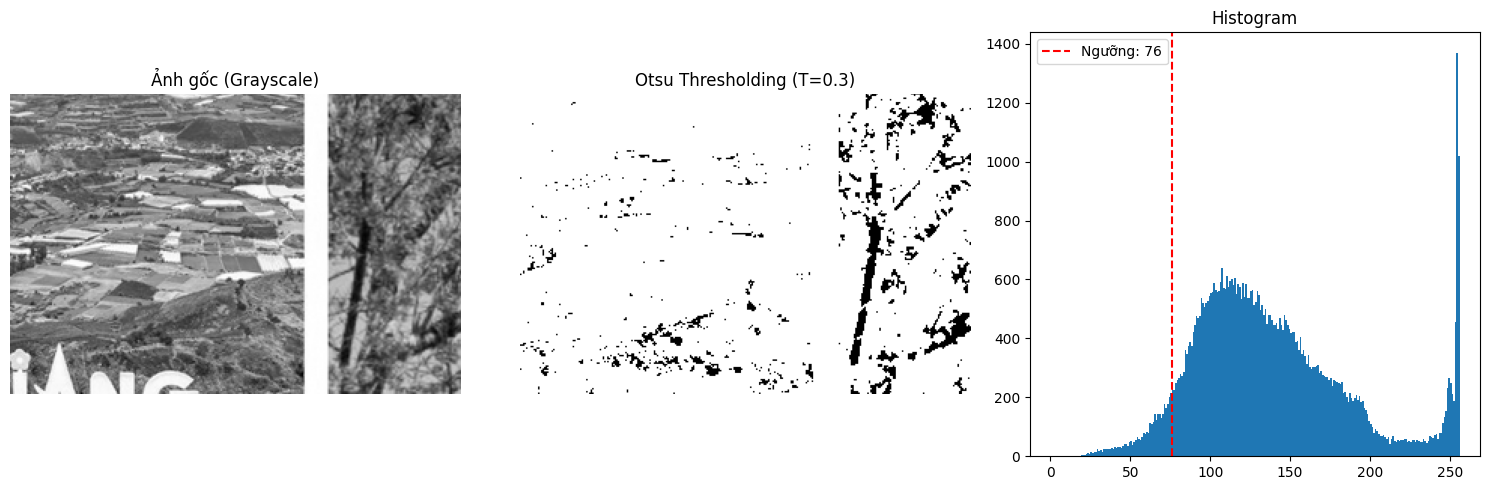

In [4]:
# Chuyển sang grayscale
gray_langbiang = cv2.cvtColor(langbiang_region, cv2.COLOR_BGR2GRAY)

# Áp dụng phương pháp Otsu với ngưỡng 0.3
threshold_value = int(0.3 * 255)  # 0.3 * 255 = 76.5
_, otsu_result = cv2.threshold(gray_langbiang, threshold_value, 255, cv2.THRESH_BINARY)

# Hiển thị kết quả
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_langbiang, cmap='gray')
plt.title('Ảnh gốc (Grayscale)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(otsu_result, cmap='gray')
plt.title(f'Otsu Thresholding (T=0.3)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.hist(gray_langbiang.ravel(), 256, [0, 256])
plt.axvline(x=threshold_value, color='red', linestyle='--', label=f'Ngưỡng: {threshold_value}')
plt.title('Histogram')
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
# Lưu ảnh kết quả
cv2.imwrite('lang_biang.jpg', otsu_result)
print("Đã lưu ảnh kết quả: lang_biang.jpg")
print(f"Ngưỡng sử dụng: {threshold_value} (0.3 × 255)")

Đã lưu ảnh kết quả: lang_biang.jpg
Ngưỡng sử dụng: 76 (0.3 × 255)


# Bài tập 2: Chọn vùng ảnh Hồ Xuân Hương

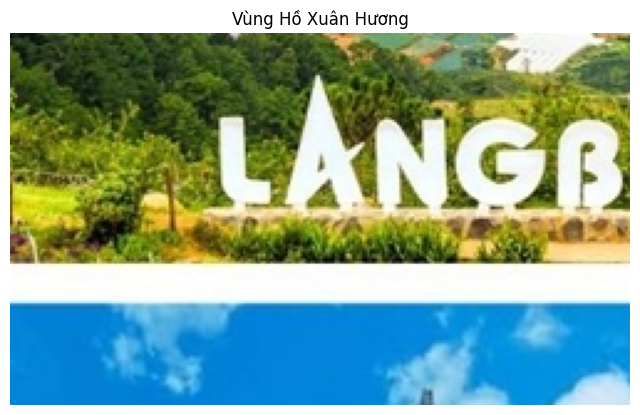

In [6]:
# Chọn vùng Hồ Xuân Hương
x2, y2, width2, height2 = 50, 250, 250, 150  # Vùng hồ
ho_xuan_huong_region = dalat_img[y2:y2+height2, x2:x2+width2]

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(ho_xuan_huong_region, cv2.COLOR_BGR2RGB))
plt.title('Vùng Hồ Xuân Hương')
plt.axis('off')
plt.show()

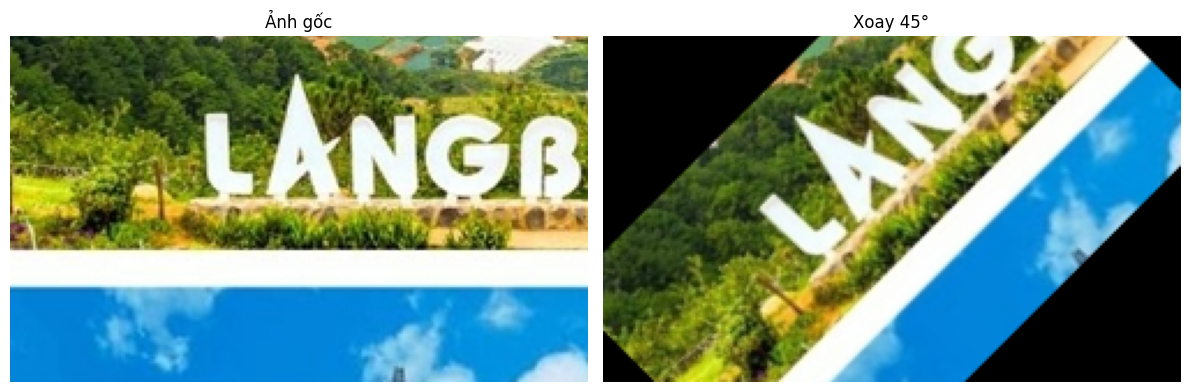

In [7]:
# Xoay đối tượng 45 độ
h2, w2 = ho_xuan_huong_region.shape[:2]
center = (w2//2, h2//2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_ho = cv2.warpAffine(ho_xuan_huong_region, rotation_matrix, (w2, h2))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(ho_xuan_huong_region, cv2.COLOR_BGR2RGB))
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_ho, cv2.COLOR_BGR2RGB))
plt.title('Xoay 45°')
plt.axis('off')
plt.tight_layout()
plt.show()

C:\Users\VUHOANG\AppData\Local\Temp\ipykernel_13308\2558595266.py:19: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(gray_ho.ravel(), 256, [0, 256])


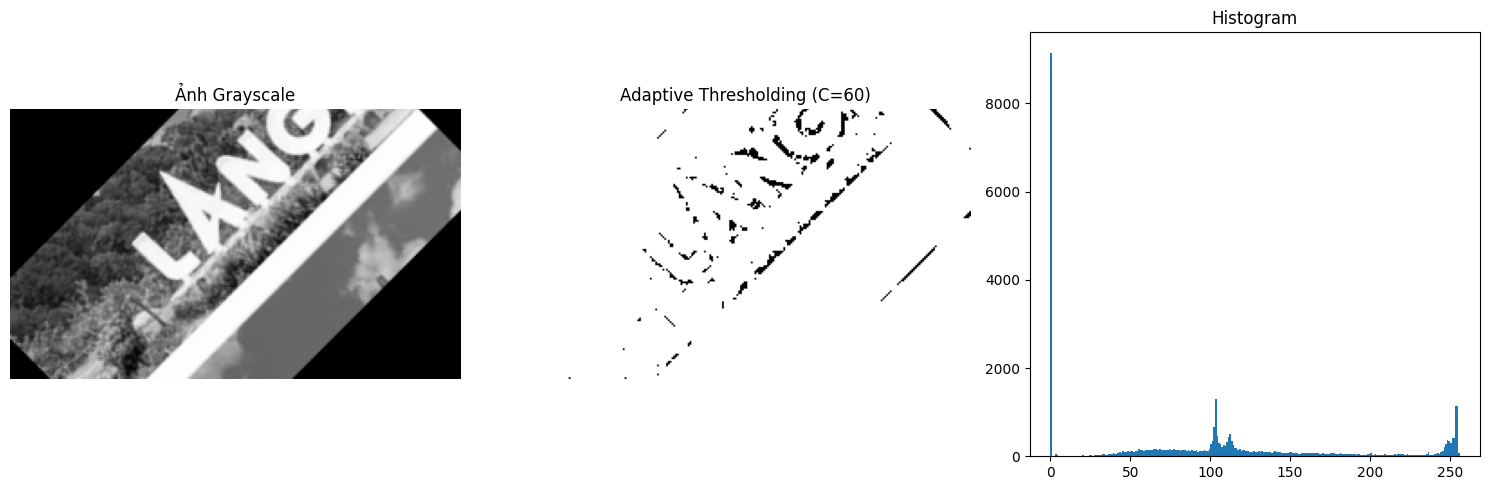

In [8]:
# Chuyển sang grayscale và áp dụng Adaptive Thresholding
gray_ho = cv2.cvtColor(rotated_ho, cv2.COLOR_BGR2GRAY)
adaptive_result = cv2.adaptiveThreshold(gray_ho, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 60)

# Hiển thị kết quả
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_ho, cmap='gray')
plt.title('Ảnh Grayscale')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(adaptive_result, cmap='gray')
plt.title('Adaptive Thresholding (C=60)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.hist(gray_ho.ravel(), 256, [0, 256])
plt.title('Histogram')

plt.tight_layout()
plt.show()

In [9]:
# Lưu ảnh kết quả
cv2.imwrite('ho_xuan_huong.jpg', adaptive_result)
print("Đã lưu ảnh kết quả: ho_xuan_huong.jpg")
print("Phương pháp: Adaptive Thresholding với C = 60")

Đã lưu ảnh kết quả: ho_xuan_huong.jpg
Phương pháp: Adaptive Thresholding với C = 60


# Bài tập 3: Chọn vùng ảnh Quảng Trường Lâm Viên

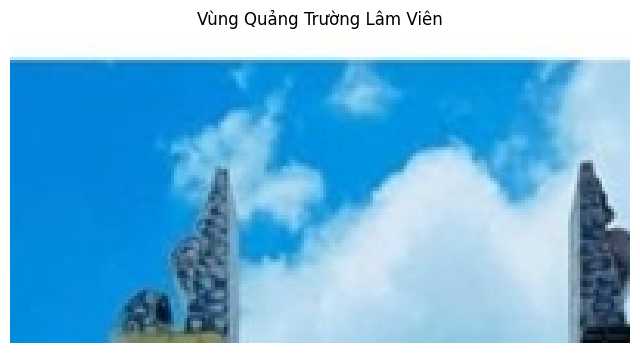

In [10]:
# Chọn vùng Quảng trường Lâm Viên
x3, y3, width3, height3 = 150, 350, 200, 100  # Vùng quảng trường
lam_vien_region = dalat_img[y3:y3+height3, x3:x3+width3]

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(lam_vien_region, cv2.COLOR_BGR2RGB))
plt.title('Vùng Quảng Trường Lâm Viên')
plt.axis('off')
plt.show()

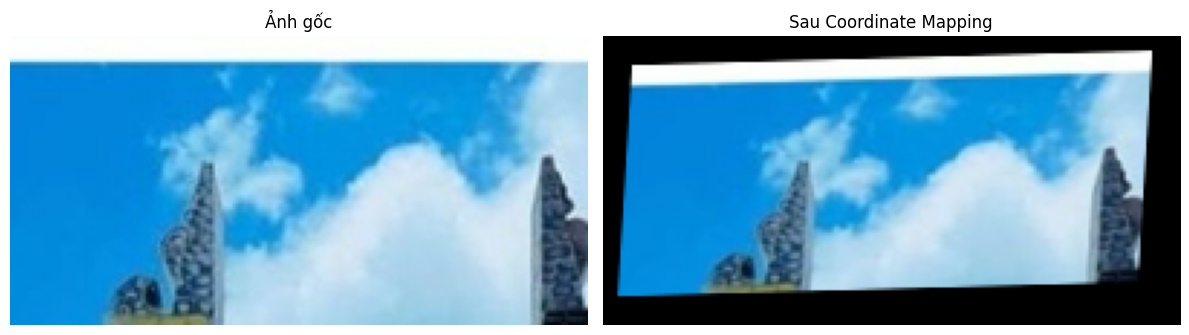

In [11]:
# Coordinate Mapping (Geometric Transformation)
h3, w3 = lam_vien_region.shape[:2]

# Tạo ma trận biến đổi affine đơn giản (scale và translate)
src_points = np.float32([[0, 0], [w3, 0], [0, h3]])
dst_points = np.float32([[10, 10], [w3-10, 5], [5, h3-10]])
transform_matrix = cv2.getAffineTransform(src_points, dst_points)

# Áp dụng coordinate mapping
mapped_region = cv2.warpAffine(lam_vien_region, transform_matrix, (w3, h3))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(lam_vien_region, cv2.COLOR_BGR2RGB))
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(mapped_region, cv2.COLOR_BGR2RGB))
plt.title('Sau Coordinate Mapping')
plt.axis('off')
plt.tight_layout()
plt.show()

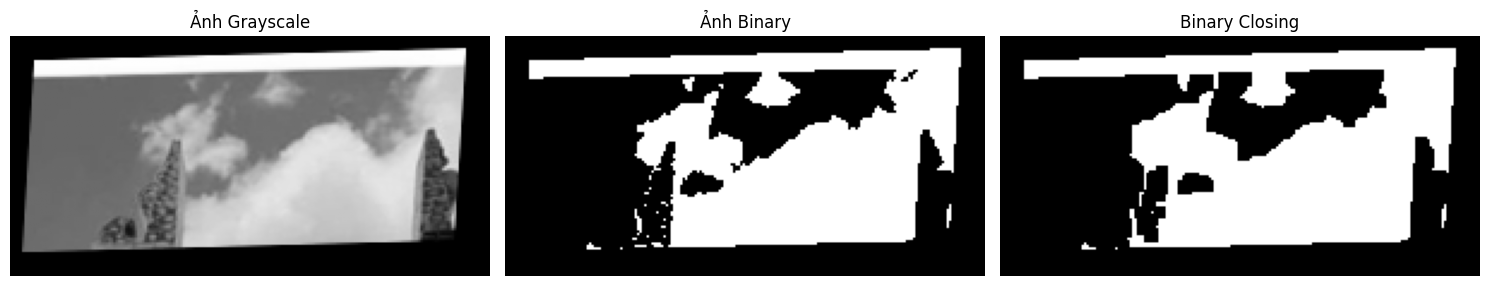

In [12]:
# Chuyển sang grayscale và áp dụng Binary Closing
gray_lam_vien = cv2.cvtColor(mapped_region, cv2.COLOR_BGR2GRAY)

# Tạo ảnh binary trước khi closing
_, binary_img = cv2.threshold(gray_lam_vien, 127, 255, cv2.THRESH_BINARY)

# Tạo kernel cho morphological operations
kernel = np.ones((5,5), np.uint8)

# Áp dụng Binary Closing (dilation followed by erosion)
closing_result = cv2.morphologyEx(binary_img, cv2.MORPH_CLOSE, kernel)

# Hiển thị kết quả
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_lam_vien, cmap='gray')
plt.title('Ảnh Grayscale')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(binary_img, cmap='gray')
plt.title('Ảnh Binary')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(closing_result, cmap='gray')
plt.title('Binary Closing')
plt.axis('off')

plt.tight_layout()
plt.show()

In [13]:
# Lưu ảnh kết quả
cv2.imwrite('quan_truong_lam_vien.jpg', closing_result)
print("Đã lưu ảnh kết quả: quan_truong_lam_vien.jpg")
print("Phương pháp: Coordinate Mapping + Binary Closing")

Đã lưu ảnh kết quả: quan_truong_lam_vien.jpg
Phương pháp: Coordinate Mapping + Binary Closing


# Bài tập 4: Menu xử lý ảnh

In [14]:
def show_menu():
    print("\n=== MENU XỞ LÝ ẢNH ===")
    print("geometric_transformation:")
    print("  1. coordinate_mapping")
    print("  2. Rotate")
    print("  3. Scale")
    print("  4. Shift")
    print("\nsegment:")
    print("  5. Adaptive_thresholding")
    print("  6. Binary_dilation")
    print("  7. Binary_erosion")
    print("  8. Otsu")
    print("\n9. Kết hợp 2 chức năng")
    print("0. Thoát")

def apply_geometric_transform(img, choice):
    h, w = img.shape[:2]
    
    if choice == 1:  # coordinate_mapping
        src_pts = np.float32([[0,0], [w,0], [0,h]])
        dst_pts = np.float32([[10,10], [w-10,5], [5,h-10]])
        M = cv2.getAffineTransform(src_pts, dst_pts)
        return cv2.warpAffine(img, M, (w, h))
    
    elif choice == 2:  # Rotate
        center = (w//2, h//2)
        M = cv2.getRotationMatrix2D(center, 45, 1.0)
        return cv2.warpAffine(img, M, (w, h))
    
    elif choice == 3:  # Scale
        return cv2.resize(img, None, fx=1.2, fy=1.2)
    
    elif choice == 4:  # Shift
        M = np.float32([[1,0,50], [0,1,30]])
        return cv2.warpAffine(img, M, (w, h))

def apply_segmentation(img, choice):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if len(img.shape) == 3 else img
    
    if choice == 5:  # Adaptive_thresholding
        return cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    
    elif choice == 6:  # Binary_dilation
        _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
        kernel = np.ones((5,5), np.uint8)
        return cv2.dilate(binary, kernel, iterations=1)
    
    elif choice == 7:  # Binary_erosion
        _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
        kernel = np.ones((5,5), np.uint8)
        return cv2.erode(binary, kernel, iterations=1)
    
    elif choice == 8:  # Otsu
        _, result = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        return result

In [15]:
def process_image():
    # Sử dụng ảnh Đà Lạt làm ảnh mẫu
    img = dalat_img.copy()
    
    while True:
        show_menu()
        choice = input("\nChọn chức năng (0-9): ")
        
        try:
            choice = int(choice)
        except:
            print("Vui lòng nhập số!")
            continue
        
        if choice == 0:
            print("Thoát chương trình!")
            break
        
        elif choice in [1, 2, 3, 4]:  # Geometric transformation
            result = apply_geometric_transform(img, choice)
            
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title('Ảnh gốc')
            plt.axis('off')
            
            plt.subplot(1, 2, 2)
            plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
            titles = ['', 'Coordinate Mapping', 'Rotate 45°', 'Scale 1.2x', 'Shift (50,30)']
            plt.title(titles[choice])
            plt.axis('off')
            plt.tight_layout()
            plt.show()
        
        elif choice in [5, 6, 7, 8]:  # Segmentation
            result = apply_segmentation(img, choice)
            
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title('Ảnh gốc')
            plt.axis('off')
            
            plt.subplot(1, 2, 2)
            plt.imshow(result, cmap='gray')
            titles = ['', '', '', '', '', 'Adaptive Thresholding', 'Binary Dilation', 'Binary Erosion', 'Otsu']
            plt.title(titles[choice])
            plt.axis('off')
            plt.tight_layout()
            plt.show()
        
        elif choice == 9:  # Kết hợp 2 chức năng
            geo_choice = int(input("Chọn geometric transformation (1-4): "))
            seg_choice = int(input("Chọn segmentation (5-8): "))
            
            if geo_choice in [1,2,3,4] and seg_choice in [5,6,7,8]:
                # Áp dụng geometric transformation trước
                temp_result = apply_geometric_transform(img, geo_choice)
                # Rồi áp dụng segmentation
                final_result = apply_segmentation(temp_result, seg_choice)
                
                plt.figure(figsize=(15, 5))
                plt.subplot(1, 3, 1)
                plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                plt.title('Ảnh gốc')
                plt.axis('off')
                
                plt.subplot(1, 3, 2)
                plt.imshow(cv2.cvtColor(temp_result, cv2.COLOR_BGR2RGB))
                geo_titles = ['', 'Coordinate Mapping', 'Rotate', 'Scale', 'Shift']
                plt.title(geo_titles[geo_choice])
                plt.axis('off')
                
                plt.subplot(1, 3, 3)
                plt.imshow(final_result, cmap='gray')
                seg_titles = ['', '', '', '', '', 'Adaptive', 'Dilation', 'Erosion', 'Otsu']
                plt.title(f'{geo_titles[geo_choice]} + {seg_titles[seg_choice]}')
                plt.axis('off')
                plt.tight_layout()
                plt.show()
            else:
                print("Lựa chọn không hợp lệ!")
        
        else:
            print("Lựa chọn không hợp lệ!")

# Chạy chương trình
print("Chương trình menu xử lý ảnh sẵn sàng!")
print("Gọi process_image() để bắt đầu")

Chương trình menu xử lý ảnh sẵn sàng!
Gọi process_image() để bắt đầu


In [16]:
# Chạy menu xử lý ảnh
process_image()


=== MENU XỞ LÝ ẢNH ===
geometric_transformation:
  1. coordinate_mapping
  2. Rotate
  3. Scale
  4. Shift

segment:
  5. Adaptive_thresholding
  6. Binary_dilation
  7. Binary_erosion
  8. Otsu

9. Kết hợp 2 chức năng
0. Thoát
Thoát chương trình!
